# Data Processing 1 Project: Nutrition Parameter Analysis

### Information 
**Anton Wohlgemuth 11778996**

E-Mail: 11778996@s.wu.ac.at

**Michal Maternicki 1552836**

E-Mail: 1552836@s.wu.ac.at

## Reading the Data

In [1]:
import pandas as pd 

df = pd.read_excel('./data/data_notebook-1_nutrition.xlsx')

### Is the dataset tidy or messy?

##### Definition of a tidy dataset:
-  Each variable forms a column and contains values
-  Each observation forms a row
-  Each type of observational unit forms a table


In [2]:
## Printing the first rows of the dataset to get an overview of the structure
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In order to tidy this dataset, we need to melt it. The pandas library has a built-in function that allows to do just that. It “unpivots” a DataFrame from a wide format to a long format.

In [3]:
df_tidy = pd.melt(df,["NDB_No"],
                       var_name="variable",
                       value_name="value")
df_tidy = df_tidy.sort_values(by=["NDB_No"]).reset_index()
df_tidy.head(10)

,index,NDB_No,variable,value
0,0,1001,Shrt_Desc,"BUTTER,WITH SALT"
1,149430,1001,Manganese_(mg),0
2,140640,1001,Copper_mg),0
3,395550,1001,FA_Poly_(g),3.043
4,131850,1001,Zinc_(mg),0.09
5,123060,1001,Sodium_(mg),643
6,404340,1001,Cholestrl_(mg),215
7,114270,1001,Potassium_(mg),24
8,105480,1001,Phosphorus_(mg),24
9,96690,1001,Magnesium_(mg),2


Now we have a tidy version of our dataset

#### What kind of data objects do we have?

In [4]:
print(df.dtypes)

NDB_No                 int64
Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)  

##### How many different kinds of data objects are covered?

There are 3 different dataobjects in this dataset. 
The Pandas Types: object (string), int64 (int), float64 (float)

The dataobject object contains qualitative data. 
The dataobjects int64 and float64 contain quantitative data.

Further Information: 
* PANDAS TYPE : NATIVE PYTHON TYPE
* object : string
* int64 : int 
* float64 : float



#### How many unique values do we have per column?

In [5]:
for col in df.columns :
    print(col, len(df[col].unique())) 

NDB_No 8790
Shrt_Desc 8787
Water_(g) 4285
Energ_Kcal 671
Protein_(g) 2664
Lipid_Tot_(g) 2421
Ash_(g) 689
Carbohydrt_(g) 3328
Fiber_TD_(g) 252
Sugar_Tot_(g) 1919
Calcium_(mg) 558
Iron_(mg) 954
Magnesium_(mg) 314
Phosphorus_(mg) 641
Potassium_(mg) 904
Sodium_(mg) 1247
Zinc_(mg) 943
Copper_mg) 812
Manganese_(mg) 1254
Selenium_(µg) 646
Vit_C_(mg) 561
Thiamin_(mg) 911
Riboflavin_(mg) 834
Niacin_(mg) 3813
Panto_Acid_mg) 1480
Vit_B6_(mg) 987
Folate_Tot_(µg) 374
Folic_Acid_(µg) 263
Food_Folate_(µg) 267
Folate_DFE_(µg) 440
Choline_Tot_ (mg) 1198
Vit_B12_(µg) 694
Vit_A_IU 1338
Vit_A_RAE 566
Retinol_(µg) 439
Alpha_Carot_(µg) 215
Beta_Carot_(µg) 582
Beta_Crypt_(µg) 144
Lycopene_(µg) 267
Lut+Zea_ (µg) 543
Vit_E_(mg) 567
Vit_D_µg 122
Vit_D_IU 242
Vit_K_(µg) 513
FA_Sat_(g) 3951
FA_Mono_(g) 4009
FA_Poly_(g) 2899
Cholestrl_(mg) 314
GmWt_1 514
GmWt_Desc1 912
GmWt_2 819
GmWt_Desc2 922
Refuse_Pct 78


##### What are the different variables? 

| Variables | Description |
| ----------- | ----------- |
| NDB_No | numerical variable, fixed (identifier), 8790 different values |
| Shrt_Desc | nominal variable, 8787 different values |
| Water_(g)  |  numerical ratio variable, measured, 4285 different values |
| Energ_Kcal  | numerical ratio variable, measured, 671 different values |
| Protein_(g) | numerical ratio variable, measured, 2664 different value |
| Lipid_Tot_(g) | numerical ratio variable, measured, 2421 different values |
| Ash_(g) | numerical ratio variable, measured, 689 different values |
| Carbohydrt_(g) | numerical ratio variable, measured, 3328 different values |
| Fiber_TD_(g) | numerical ratio variable, measured, 252 different values |
| Sugar_Tot_(g) | numerical ratio variable, measured, 1919 different values |
| Calcium_(mg) | numerical ratio variable, measured, 558 different values |
| Iron_(mg) | numerical ratio variable, measured, 954 different values |
| Magnesium_(mg) | numerical ratio variable, measured, 314 different values |
| Phosphorus_(mg) | numerical ratio variable, measured, 641 different values |
| Potassium_(mg) |  numerical ratio variable, measured, 904 different values |
| Sodium_(mg) |  numerical ratio variable, measured, 1247 different values |
| Zinc_(mg) | numerical ratio variable, measured, 943 different values |
| Copper_mg | numerical ratio variable, measured, 812 different values|
| Manganese_(mg)  | numerical ratio variable, measured, 1254 different values |
| Selenium_(µg) | numerical ratio variable, measured, 646 different values |
| Vit_C_(mg) | numerical ratio variable, measured, 561 different values |
| Thiamin_(mg) |  numerical ratio variable, measured, 911 different values |
| Riboflavin_(mg) |  numerical ratio variable, measured, 834 different values |
| Niacin_(mg) | numerical ratio variable, measured, 3813 different values |
| Panto_Acid_(mg) | numerical ratio variable, measured, 1480 different values |
| Vit_B6_(mg)  | numerical ratio variable, measured, 987 different values |
| Folate_Tot_(µg) | numerical ratio variable, measured, 374 different values |
| Folic_Acid_(µg) | numerical ratio variable, measured, 263 different values |
| Food_Folate_(µg) |  numerical ratio variable, measured, 267 different values |
| Folate_DFE_(µg) | numerical ratio variable, measured, 440 different values |
| Choline_Tot_(mg) | numerical ratio variable, measured, 1198 different values |
| Vit_B12_(µg) | numerical ratio variable, measured, 694 different values |
| Vit_A_IU | numerical ratio variable, measured, 1338 different values |
| Vit_A_RAE | numerical ratio variable, measured, 566 different values |
| Retinol_(µg) | numerical ratio variable, measured, 439 different values |
| Alpha_Carot_(µg) | numerical ratio variable, measured, 215 different values |
| Beta_Carot_(µg) | numerical ratio variable, measured, 582 different values |
| Beta_Crypt_(µg) | numerical ratio variable, measured, 144 different values |
| Lycopene_(µg) | numerical ratio variable, measured, 267 different values |
| Lut+Zea_(µg) | numerical ratio variable, measured, 543 different values |
| Vit_E_(mg) | numerical ratio variable, measured, 567 different values |
| Vit_D_(µg) | numerical ratio variable, measured, 122 different values |
| Vit_D_IU | numerical ratio variable, measured, 242 different values |
| Vit_K_(µg) | numerical ratio variable, measured, 513 different values |
| FA_Sat_(g) | numerical ratio variable, measured, 3951 different values |
| FA_Mono_(g) | numerical ratio variable, measured, 4009 different values |
| FA_Poly_(g) | numerical ratio variable, measured, 2899 different values |
| Cholestrl_(mg) | numerical ratio variable, measured, 314 different values |
| GmWt_1 | numerical ratio variable, measured, 514 different values |
| GmWt_Desc1 | nominal variable, 912 different values  |
| GmWt_2 | numerical ratio variable, measured, 819 different values |
| GmWt_Desc2 | nominal variable, 922 different values |
| Refuse_Pct | numerical ratio variable, measured, 78 different values |

## Checking Duplicate Data:

In [6]:
## The function .duplicated() (pandas) returns a series of booleans(true/false) that indicate 
## if there is a entry previous to current entry that is identical
## In short if a row is a duplicate of a previous row the function returns TRUE

# print(gerd_funds_df.duplicated()) 

## To get the total amount of duplicates we simply take the sum of the series, because TRUE == 1 and FALSE == 0.
## The sum then shows how many duplicates are in the dataset. 

print("There are " + str(df.duplicated().sum()) + " duplicates in the dataset")

## The Sum is 0 hence there are no duplicates in our dataset!

There are 0 duplicates in the dataset


We are lucky because we don't have any duplicates in our dataset.

## Checking Missing Data:

In [7]:
## At first we check if there are any values in our dataframe that are NaN's, maybe we are lucky.
print(df.isna().any())

# Seems like we have some Missing Values in our dataset. 
# Let's take a closer look

NDB_No               False
Shrt_Desc            False
Water_(g)             True
Energ_Kcal           False
Protein_(g)          False
Lipid_Tot_(g)        False
Ash_(g)               True
Carbohydrt_(g)       False
Fiber_TD_(g)          True
Sugar_Tot_(g)         True
Calcium_(mg)          True
Iron_(mg)             True
Magnesium_(mg)        True
Phosphorus_(mg)       True
Potassium_(mg)        True
Sodium_(mg)           True
Zinc_(mg)             True
Copper_mg)            True
Manganese_(mg)        True
Selenium_(µg)         True
Vit_C_(mg)            True
Thiamin_(mg)          True
Riboflavin_(mg)       True
Niacin_(mg)           True
Panto_Acid_mg)        True
Vit_B6_(mg)           True
Folate_Tot_(µg)       True
Folic_Acid_(µg)       True
Food_Folate_(µg)      True
Folate_DFE_(µg)       True
Choline_Tot_ (mg)     True
Vit_B12_(µg)          True
Vit_A_IU              True
Vit_A_RAE             True
Retinol_(µg)          True
Alpha_Carot_(µg)      True
Beta_Carot_(µg)       True
B

### How many missing values do we have in each column?

In [8]:
for col in df.columns :
    print("Number of NaN's in "+str(col) + " " + str(len(df[df[col].isnull()].index)))

Number of NaN's in NDB_No 0
Number of NaN's in Shrt_Desc 0
Number of NaN's in Water_(g) 1
Number of NaN's in Energ_Kcal 0
Number of NaN's in Protein_(g) 0
Number of NaN's in Lipid_Tot_(g) 0
Number of NaN's in Ash_(g) 325
Number of NaN's in Carbohydrt_(g) 0
Number of NaN's in Fiber_TD_(g) 594
Number of NaN's in Sugar_Tot_(g) 1832
Number of NaN's in Calcium_(mg) 348
Number of NaN's in Iron_(mg) 144
Number of NaN's in Magnesium_(mg) 739
Number of NaN's in Phosphorus_(mg) 579
Number of NaN's in Potassium_(mg) 426
Number of NaN's in Sodium_(mg) 83
Number of NaN's in Zinc_(mg) 706
Number of NaN's in Copper_mg) 1257
Number of NaN's in Manganese_(mg) 2160
Number of NaN's in Selenium_(µg) 1700
Number of NaN's in Vit_C_(mg) 818
Number of NaN's in Thiamin_(mg) 634
Number of NaN's in Riboflavin_(mg) 616
Number of NaN's in Niacin_(mg) 637
Number of NaN's in Panto_Acid_mg) 2242
Number of NaN's in Vit_B6_(mg) 905
Number of NaN's in Folate_Tot_(µg) 1261
Number of NaN's in Folic_Acid_(µg) 2039
Number o

For our analysis we need only the informations of the following columns:
Sugar_Tot_(g)
Energ_Kcal
Lipid_Tot_(g)
Fibre_TD_(g)
Cholestrl_(mg)
Water_(g)
Vit_C_(g)
Vit_B12_(µg)

Let's see with how many NAN's we have to deal in this columns.

In [9]:
# Checking with how many NANs we have to deal

sugars_nans = df[df['Sugar_Tot_(g)'].isnull()]
print("Number of NaN's in 'Sugar_Tot_(g)': " + str(len(sugars_nans.index)))

energy_nans = df[df['Energ_Kcal'].isnull()]
print("Number of NaN's in 'Energ_Kcal': " + str(len(energy_nans.index)))

fats_nans = df[df['Lipid_Tot_(g)'].isnull()]
print("Number of NaN's in 'Lipid_Tot_(g)': " + str(len(fats_nans.index)))

fibre_nans = df[df['Fiber_TD_(g)'].isnull()]
print("Number of NaN's in 'Fiber_TD_(g): " + str(len(fibre_nans.index)))

cholesterol_nans = df[df['Cholestrl_(mg)'].isnull()]
print("Number of NaN's in 'Cholestrl_(mg)': " + str(len(cholesterol_nans.index)))

water_nans = df[df['Water_(g)'].isnull()]
print("Number of NaN's in 'Water_(g)': " + str(len(water_nans.index)))

vitC_nans = df[df['Vit_C_(mg)'].isnull()]
print("Number of NaN's in 'Vit_C_(mg)': " + str(len(vitC_nans.index)))

vitB12_nans = df[df['Vit_B12_(µg)'].isnull()]
print("Number of NaN's in 'Vit_B12_(µg)': " + str(len(vitB12_nans.index)))

Number of NaN's in 'Sugar_Tot_(g)': 1832
Number of NaN's in 'Energ_Kcal': 0
Number of NaN's in 'Lipid_Tot_(g)': 0
Number of NaN's in 'Fiber_TD_(g): 594
Number of NaN's in 'Cholestrl_(mg)': 410
Number of NaN's in 'Water_(g)': 1
Number of NaN's in 'Vit_C_(mg)': 818
Number of NaN's in 'Vit_B12_(µg)': 1193


#### Dealing with the missing data:

We have 6 relevant columns that contain missing values. 

Since we don't work here with time series data, simple imputation techniques won't work with our dataset.

In order to deal with the missing data, we came to the conclusion that the best way to handle this would be to merge our dataset with one or more other datasets that may contain the missing informations. We added this Task to out **Future-Work** section.

# Correlations:

We decided to calculate Pearson correlation coefficient to check if our two selected variables are linearly related. 

The PCC value is number between -1 and 1. The value -1 means: variables are negatively related (if first increase the second decrease). The value 1 means: variables are positively related (if first increase the second also increase). The value 0 means that values are not related. 

- First we created separate data frames with variables for further calculations and dropped missing values. 
- After it we have used library numpy to calculate Pearson correlation coefficient. 
- The last step was illustrating correlations using scatter plot. We used matplotlib and matplotlib.pyplot libraries to do it.

### Subsetting the relevant data we need to calculate our correlation coefficients

In [10]:
fats_calories = df[['Lipid_Tot_(g)','Energ_Kcal']]

sugar_calories = df[['Sugar_Tot_(g)','Energ_Kcal']]
sugar_calories = sugar_calories.dropna()

cal_water = df[['Energ_Kcal','Water_(g)']]
cal_water = cal_water.dropna()

fibre_vitC = df[['Fiber_TD_(g)','Vit_C_(mg)']]
fibre_vitC = fibre_vitC.dropna()

fibre_vitB = df[['Fiber_TD_(g)','Vit_B12_(µg)']]
fibre_vitB = fibre_vitB.dropna()

fats_chol = df[['Lipid_Tot_(g)','Cholestrl_(mg)']]
fats_chol = fats_chol.dropna()

### Calculating our correlations:

In [11]:
import numpy as np

cor_cal_water = np.corrcoef(cal_water['Water_(g)'], cal_water['Energ_Kcal'])

cor_sugar_calories = np.corrcoef(sugar_calories['Sugar_Tot_(g)'], sugar_calories['Energ_Kcal'])

cor_fats_calories = np.corrcoef(fats_calories['Lipid_Tot_(g)'], fats_calories['Energ_Kcal'])

cor_fibre_vitC = np.corrcoef(fibre_vitC['Fiber_TD_(g)'], fibre_vitC['Vit_C_(mg)'])

cor_fibre_vitB = np.corrcoef(fibre_vitB['Fiber_TD_(g)'],fibre_vitB['Vit_B12_(µg)'])

cor_fats_chol = np.corrcoef(fats_chol['Lipid_Tot_(g)'], fats_chol['Cholestrl_(mg)'])

print("PCC Calories-Water:  " +str(cor_cal_water[1,0]))
print("PCC Sugar-Calories:  " +str(cor_sugar_calories[1,0]))
print("PCC Fats-Calories:  " +str(cor_fats_calories[1,0]))
print("PCC Fibre-VitaminC:  " +str(cor_fibre_vitC[1,0]))
print("PCC Fibre-VitaminB:  " +str(cor_fibre_vitB[1,0]))
print("PCC Fats-Cholesterol:  " +str(cor_fats_chol[1,0]))



PCC Calories-Water:  -0.900553641503
PCC Sugar-Calories:  0.351312534621
PCC Fats-Calories:  0.806677268861
PCC Fibre-VitaminC:  0.071354907525
PCC Fibre-VitaminB:  -0.0599255521675
PCC Fats-Cholesterol:  0.088130926988


### Plotting the correlating variables in a scatter plot

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

Text(0,0.5,'Energ_Kcal/100g')

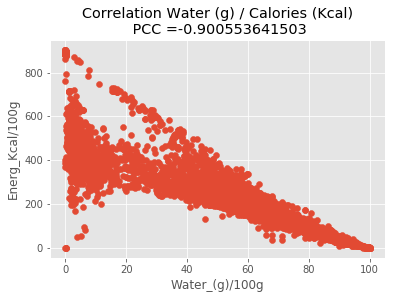

In [13]:
plt.scatter(cal_water['Water_(g)'], cal_water['Energ_Kcal'])
plt.title('Correlation Water (g) / Calories (Kcal)\n PCC =' + str(cor_cal_water[1,0]))
plt.xlabel('Water_(g)/100g')
plt.ylabel('Energ_Kcal/100g')

#### Correlation: water and calories
The first correlation that we have calculated was the possible dependency between the two parameters water in g  and energy in Kcal. 

In this case we expected to have some negative correlation. That means if the amount of water is high in some product, the content of calories is low. This dependencies works also in the opposite direction. 

After calculating we received the Pearson correlation coefficient (PCC) is -0.900511159061. We can state that in this case we can observe the high negative relationship between parameters. 

We can also observe this correlation using correlation chart above.

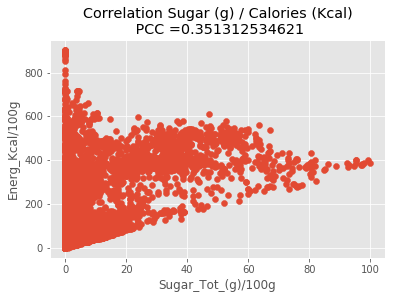

In [14]:
plt.scatter(sugar_calories['Sugar_Tot_(g)'], sugar_calories['Energ_Kcal'])
plt.title('Correlation Sugar (g) / Calories (Kcal)\n PCC =' + str(cor_sugar_calories[1,0]))
plt.xlabel('Sugar_Tot_(g)/100g')
plt.ylabel('Energ_Kcal/100g')
plt.show()

#### Correlation: Sugar and calories

The next correlation that we have calculated was the relationship between content of sugar and calories. 

We expected to have some positive correlation (If one parameter increases, the second one also increases). 

The PCC in this case is 0.351312534621. The level of correlations is quite low what we can observe using correlation chart above.

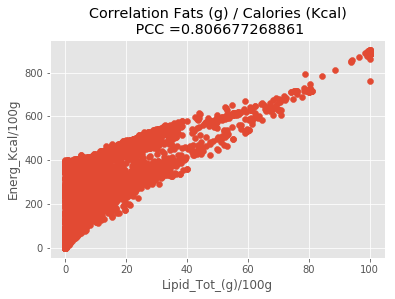

In [15]:
plt.scatter(fats_calories['Lipid_Tot_(g)'], fats_calories['Energ_Kcal'])
plt.title('Correlation Fats (g) / Calories (Kcal)\n PCC =' + str(cor_fats_calories[1,0]))
plt.xlabel('Lipid_Tot_(g)/100g')
plt.ylabel('Energ_Kcal/100g')
plt.show()

####  Correlation: Fat and calories
The third correlation is possible relationship between content of fat and calories.

We have expected that in this case can occur some positive correlation. 

After calculating it we know that PCC is 0.806677268861, what is quite high level of positive correlation. The chart below shows how this correlation looks like.

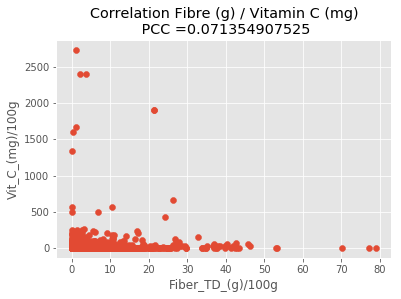

In [16]:
plt.scatter(fibre_vitC['Fiber_TD_(g)'], fibre_vitC['Vit_C_(mg)'])
plt.title('Correlation Fibre (g) / Vitamin C (mg)\n PCC =' + str(cor_fibre_vitC[1,0]))
plt.xlabel('Fiber_TD_(g)/100g')
plt.ylabel('Vit_C_(mg)/100g')
plt.show()



#### Correlation: Fibre and Vitamin C
The next correlation was the possible dependencies between contain of fibre and vitamin C in product. 

We didn’t expect any correlation between this two parameters. 

In this case PCC is 0.071354907525. The result is close to 0 what means that there is any correlation observed or the level of it is very low. We can also observe it using the correlation chart above.

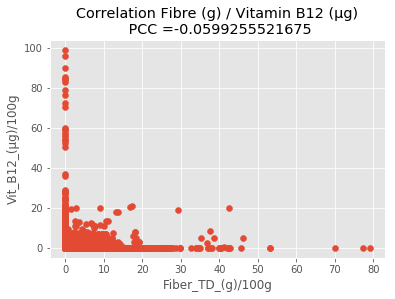

In [17]:
plt.scatter(fibre_vitB['Fiber_TD_(g)'],fibre_vitB['Vit_B12_(µg)'])
plt.title('Correlation Fibre (g) / Vitamin B12 (µg)\n PCC =' + str(cor_fibre_vitB[1,0]))
plt.xlabel('Fiber_TD_(g)/100g')
plt.ylabel('Vit_B12_(µg)/100g')
plt.show()


#### Correlation: Fibre and Vitamin B
The fifth correlation that we have calculated was between parameters fibre and vitamin B. 

We expected like in the previous example, that we would not observe any correlation.

The PCC in this case is  -0.0599255521675. The negative correlation level is very low and we can say that in this case any correlation occurs.

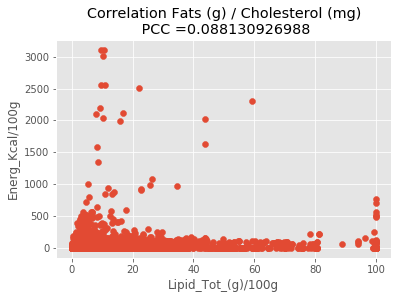

In [18]:
plt.scatter(fats_chol['Lipid_Tot_(g)'], fats_chol['Cholestrl_(mg)'])
plt.title('Correlation Fats (g) / Cholesterol (mg)\n PCC =' + str(cor_fats_chol[1,0]))
plt.xlabel('Lipid_Tot_(g)/100g')
plt.ylabel('Energ_Kcal/100g')
plt.show()

#### Correlation: Fats and Cholesterol
The last correlation which has been calculated is relationship between contain of fats and cholesterol in the product. 

We expected to observe some positive correlation. 

The PCC is  0.088130926988 what means that the positive correlation’s level is very low or even there is any correlation between this parameters. 

We have also present this relationship using chart above.

####  In order to get more insights out of our correlation plots we colorized the different food groups in our plots. We added them to the bottom of our notebook

## Visual analysis: Parallel Coordinates:

We heard about parallel coordinates as a way to visualize correlations in another class. We wanted to plot on of them for the data we have given, just to get a feel of this visualization type. 

With parallel coordinates we are able to analyze more variables  at the same time and how they are relate to each other. When most of lines between two parallel axis are at a little that can mean a passive correlation between this two variables. When lines cross like "X" it tells that there is negative correlation between variables. When there is a random crossing of lines or they are parallel we can say that there is any correlation.

For this plot we used **plotly** to create our parallel coordinates.
Although the plot looks really cool, in our opinion there are better ways to visualize this correlations.

Nevertheless we kept this part in our notebook.


**In order to use plotly you need to install it by running the cell below.**

In [19]:
!pip install plotly

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='anton32', api_key='pSlm6T39yXuL9ov2WBh1')

import pandas as pd 

data = [
    go.Parcoords(
        line = dict(color = df['NDB_No'],
                   colorscale = [[0,'#D7C16B'],[0.5,'#23D8C3'],[1,'#F3F10F']]),
        dimensions = list([
            dict(range = [df['Energ_Kcal'].min() , df['Energ_Kcal'].max()],
                constraintrange = [df['Energ_Kcal'].min() , df['Energ_Kcal'].max()],
                label = 'Energy [kcal]/100g', values = df['Energ_Kcal']),
            dict(range = [df['Sugar_Tot_(g)'].min() , df['Sugar_Tot_(g)'].max()],
                label = 'Sugar [g]/100g', values = df['Sugar_Tot_(g)']),
            dict(range = [df['Lipid_Tot_(g)'].min() , df['Lipid_Tot_(g)'].max()],
                label = 'Fats [g]/100g', values = df['Lipid_Tot_(g)']),
            dict(range = [df['Cholestrl_(mg)'].min() , df['Cholestrl_(mg)'].max()],
                label = 'Cholesterol [g]/100g', values = df['Cholestrl_(mg)'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~anton32/0 or inside your plot.ly account where it is named 'parcoords-basic'


## Clustering: (based on 1-parameter)

We wanted to cluster types of food based on their energy parameter (Energ_kcal), and see how many cluster we need to describe our data best. 

We assumed that we may find 3 different clusters that describe low, medium and high calorie food. 

### Visual Analysis:

We plotted a histogram to understand the distribution of the energy parameter and find clusters in this visualization

Text(0.5,0,'kcal /100g')

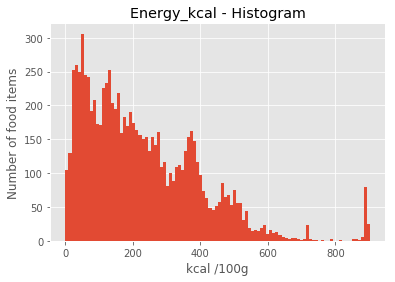

In [21]:
matplotlib.pyplot.hist(df['Energ_Kcal'], bins = 100)
plt.title("Energy_kcal - Histogram")
plt.ylabel('Number of food items')
plt.xlabel('kcal /100g')

Based on the histogram, we assume that their are 3 clusters. 

- low to medium calories (0 - 300 kcal/100g)
- medium calories (300 - 600 kcal/100g)
- high calories (600 - 900 kcal/100g)

### Statistical Analysis:

We now used the KMEANS clustering algorithm to cluster our data. 

##### Clustering using KMEANS

In [22]:
df_nona = df.dropna()
X_cal = df_nona[["Energ_Kcal"]] # Subsetting the relevant data for our clustering process.

#### Clustering based on Energy [kcal] - Sugar Total [g] 

In [23]:
#Skalieren der Daten 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_cal_transformed = scaler.fit_transform(X_cal)

#### How many clusters make sense?

In [24]:
from sklearn.cluster import KMeans

scores_cal = []
for n in range(2, 10):
    model_cal = KMeans(n_clusters = n)
    model_cal.fit(X_cal_transformed)
    scores_cal.append(model_cal.inertia_)

##### Plotting the elbow curve

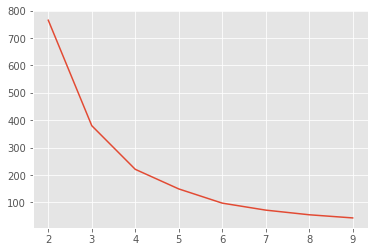

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores_cal)
plt.show()

Based on the elbow curve we decided that 3 clusters are appropiate.

In [26]:
model_cal = KMeans(n_clusters = 3)
model_cal.fit(X_cal_transformed)
labels_cal = model_cal.labels_

##### Colorizing the 3 clusters

In [27]:
indices_cluster_1 = [i for i, x in enumerate(labels_cal) if x == 0]
indices_cluster_2 = [i for i, x in enumerate(labels_cal) if x == 1]
indices_cluster_3 = [i for i, x in enumerate(labels_cal) if x == 2]

Text(0.5,0,'kcal /100g')

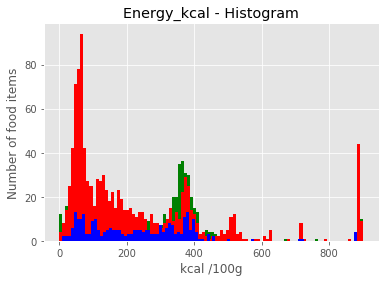

In [28]:
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_1], bins = 100, color = 'g')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_2], bins = 100, color = 'r')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_3], bins = 100, color = 'b')
plt.title("Energy_kcal - Histogram")
plt.ylabel('Number of food items')
plt.xlabel('kcal /100g')

We colorized the 3 clusters we've got from the KMEANS - algorithm. 

Somehow these 3 clusters don't make any sense.

We therefore gave another clustering algorithm a try.

#### MEAN-Shift Clustering

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth


X = np.array(list(zip(df['Energ_Kcal'],np.zeros(len(df['Energ_Kcal'])))), dtype=np.int)
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 9


The MEAN-Shift clustering algorithm tells us that there are 9 different clusters, based on the energy content of the food items

In [30]:
indices_cluster_1 = [i for i, x in enumerate(labels_cal) if x == 0]
indices_cluster_2 = [i for i, x in enumerate(labels_cal) if x == 1]
indices_cluster_3 = [i for i, x in enumerate(labels_cal) if x == 2]
indices_cluster_4 = [i for i, x in enumerate(labels_cal) if x == 3]
indices_cluster_5 = [i for i, x in enumerate(labels_cal) if x == 4]
indices_cluster_6 = [i for i, x in enumerate(labels_cal) if x == 5]
indices_cluster_7 = [i for i, x in enumerate(labels_cal) if x == 6]
indices_cluster_8 = [i for i, x in enumerate(labels_cal) if x == 7]
indices_cluster_9 = [i for i, x in enumerate(labels_cal) if x == 8]

Text(0.5,0,'kcal /100g')

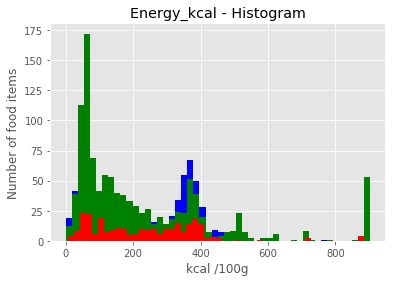

In [31]:
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_1], bins = 50, color = 'b')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_2], bins = 50, color = 'g')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_3], bins = 50, color = 'r')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_4], bins = 50, color = 'c')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_5], bins = 50, color = 'm')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_6], bins = 50, color = 'y')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_7], bins = 50, color = 'k')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_8], bins = 50, color = 'w')
matplotlib.pyplot.hist(df['Energ_Kcal'][indices_cluster_9], bins = 50, color = 'g')

plt.title("Energy_kcal - Histogram")
plt.ylabel('Number of food items')
plt.xlabel('kcal /100g')

We colorized the 9 clusters we've got from the MEAN Shift - algorithm. 

Also with MEAN-Shift we didn't get the clusters that we would have expected.

### Conclusion:

Unfortunately we didn't find any of the clusters that we have expected. 

The next thing we wanted to try is to cluster our data based on more than just 1 parameter.

## Clustering: (based on 2-parameters)

Our next goal is to cluster our data by 2 parameters.

Beforehand we expect that we can cluster our data by energy content and sugar content and find clusters that represent

- high caloric and high sugar foods
- low sugar - low caloric foods.

### Visual Analysis:

#### Clustering based on Energy [kcal] - Sugar Total [g] 

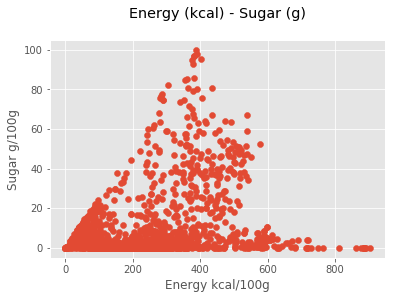

In [32]:
%matplotlib inline

df_nona = df.dropna()

import matplotlib.pyplot as plt

plt.scatter(df_nona["Energ_Kcal"], df_nona["Sugar_Tot_(g)"])
plt.title('Energy (kcal) - Sugar (g)\n')
plt.xlabel('Energy kcal/100g')
plt.ylabel('Sugar g/100g')
plt.show()

Based on this scatter plot, we don't expect to any clusters based on these 2 parameters, nevertheless we wanted to give KMEANS a try.

### Statistical Analysis:

#### KMEANS-Clustering:

In [33]:
X_cal_sugar = df_nona[["Energ_Kcal","Sugar_Tot_(g)"]] # Subsetting the relevant data for our clustering process.

In [34]:
#Skalieren der Daten  
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cal_sugar_transformed = scaler.fit_transform(X_cal_sugar)

#### How many clusters make sense?

In [35]:
from sklearn.cluster import KMeans

scores_cal_sugar = []
for n in range(2, 10):
    model_cal_sugar = KMeans(n_clusters = n)
    model_cal_sugar.fit(X_cal_sugar_transformed)
    scores_cal_sugar.append(model_cal_sugar.inertia_)

##### Plotting the elbow curve

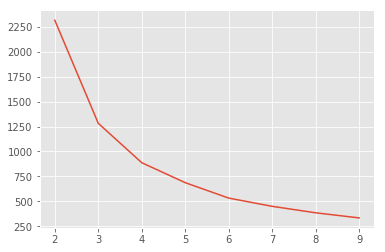

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores_cal_sugar)
plt.show()

Based on the elbow curve we expect 3 - 4 different clusters

In [37]:
model_cal_sugar = KMeans(n_clusters = 3)
model_cal_sugar.fit(X_cal_sugar_transformed)

labels_cal_sugar = model_cal_sugar.labels_

##### Colorizing the 3 clusters

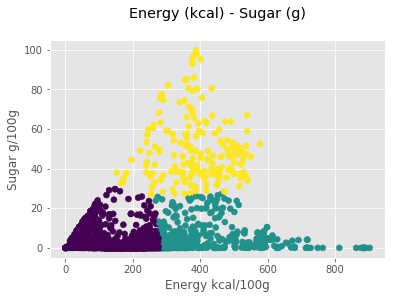

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(df_nona["Energ_Kcal"], df_nona["Sugar_Tot_(g)"], c = labels_cal_sugar)
plt.title('Energy (kcal) - Sugar (g)\n')
plt.xlabel('Energy kcal/100g')
plt.ylabel('Sugar g/100g')
plt.show()

KMEANS tells us that their should be 3 different clusters based on the parameters (kcal and sugar). 

We visualized them and were really unsatisfied with the results, because we don't think that the clustering makes any sense.

# Feedback Session:

The main feedback we've got in the poster session was that there weren't interesting insights that we found in our data. 

We already knew that and are happy about the feedback and tips we've got. 

Because we hope if we implement the feedback and tips, we are getting better results. 


### Main points:

- manually label our food data (e.g. 'sweets', 'vegetables' etc) and then try to find some interesting insights
- colorizing different food categories in our correlation plots (use this to interpret outliers)
- add a future work section

### Manually labeling different food categories:

We decided to manually label our data and add the parameter 'food-group' to our dataset.

#### Defining our food groups:

In [39]:
fruit_names = ['apple', 'banana', 'apricot', 'avocado', 'blackberry','cherry','coconut','cranberry','cucumber','date','dragonfruit','fig','goji berry','kiwi','mango','Lychee', 'melon','olive','orange','papaya','pear','peach','pineapple','pomegranate','quince','raspberry','strawberry']

sweets_names = ['chocolate','coffeecake','cookies','cookie','pie','muffins','ice creams','cocoa','snacks','candy','candies','frostings','puddings','pudding', 'tortillas','crackers','danish','popcorn','cake','dessert','ice cream', 'chocolate bar', 'cereals', 'cereal','icecream','chips', 'ice crm']

milkproducts_names = ['milk','butter','cheese','cottagecheese','yoghurt','sour_cream']

meat_names = ['chicken','pork','bacon','ham','beef','steak', 'tuna', 'salmon', 'lamb','lambs']

beverages_names =['beverages'] 

fast_food_names = ['KFC', 'Fast Foods','fast food', 'fastfood',"MCDONALD'S","WENDY'S",'PIZZA HUT','KASHI PIZZA']

vegetable_names = ['carrot','broccoli','asparagus','beans', 'soybeans','miso','cauliflower', 'corn', 'cucumber','eggplant','green pepper','lettuce', 'mushrooms','onion','potato','pumpkin','red pepper','pepper','tomato','beetroot','brussel sprouts','peas','zucchini','radish','sweet potato','artichoke','leek','cabbage','celery','chili','garlic','basil','squash','coriander','parsley','dill','rosemary','oregano','cinnamon','potatoes','bean','chickpea','lentil']

In [40]:
food_type = []

# Subtracting each Food Type out of the 'Shrt_Desc' column 
for index, row in df.iterrows():
    food_type.append( df['Shrt_Desc'][index].split(',')[0])
    
    
food_type_column = pd.Series(food_type)
df.insert(loc=0, column='Food_Type', value=food_type_column)


df["Food_Group"] =""

In [41]:
for index, row in df.iterrows():
    if df['Food_Type'][index].lower() in fruit_names:
        df.set_value(index, 'Food_Group', 'Fruits', takeable=False)
        
    if df['Food_Type'][index].lower() in sweets_names:
        df.set_value(index, 'Food_Group', 'Sweets', takeable=False)
        
    if df['Food_Type'][index].lower() in fast_food_names:
        df.set_value(index, 'Food_Group', 'FastFood', takeable=False)
    
    if df['Food_Type'][index].lower() in vegetable_names:
        df.set_value(index, 'Food_Group', 'Vegetables', takeable=False)
        
    if df['Food_Type'][index].lower() in milkproducts_names:
        df.set_value(index, 'Food_Group', 'Milk Product', takeable=False)
        
    if df['Food_Type'][index].lower() in meat_names:
        df.set_value(index, 'Food_Group', 'Meat', takeable=False)
        
    if df['Food_Type'][index].lower() in beverages_names:
        df.set_value(index, 'Food_Group', 'Beverage', takeable=False)
        

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/opt/conda/lib/python3.6/site-packages/ipy

### Subsetting the data based on the food_group 

In [42]:
fruits = df.loc[df['Food_Group'] == 'Fruits']

sweets = df.loc[df['Food_Group'] == 'Sweets']

vegetables = df.loc[df['Food_Group'] == 'Vegetables']

milk_products = df.loc[df['Food_Group'] == 'Milk Product']

meat = df.loc[df['Food_Group'] == 'Meat']

beverages = df.loc[df['Food_Group'] == 'Beverages']

fastfood = df.loc[df['Food_Group'] == 'FastFood']

### Energy Distribution w/ Food Groups

We colorized the histogram we plotted before with our 'Food groups' to understand the distribution of the energy parameter. 

Text(0.5,0,'kcal /100g')

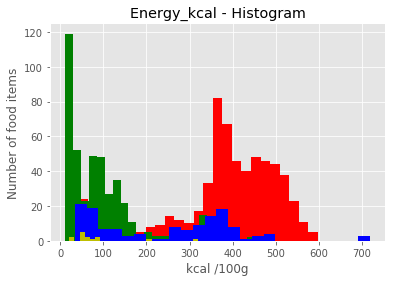

In [43]:
matplotlib.pyplot.hist(sweets['Energ_Kcal'], bins = 25, color = 'r')
matplotlib.pyplot.hist(vegetables['Energ_Kcal'], bins = 25, color = 'g')
matplotlib.pyplot.hist(milk_products['Energ_Kcal'], bins = 25, color = 'b')
matplotlib.pyplot.hist(fruits['Energ_Kcal'], bins = 25, color = 'y')
plt.title("Energy_kcal - Histogram")
plt.ylabel('Number of food items')
plt.xlabel('kcal /100g')

As expected we find most of the vegetables on the left side (low calories), and the milk products on the right reason for that is that milk products can be high in fat and fat has 9kcal/1gram, whereas carbohydrates (sugar) and also proteins only have 4,1 kcal/1 gram. 

Therefore we also find most of the sweets in the 400 calories range.

This shows us that at least in our case that **milk products may be higher in calories** per 100g **than sweets like chocolate** for example.
****

### Adding foud groups to our correlation plots:

#### Correlation: Total Energy (kcal) - Total Fats (g):

In [44]:
fats_calories_fg = df[['Food_Group','Energ_Kcal','Lipid_Tot_(g)']]
fats_calories_fg  = fats_calories_fg[fats_calories_fg['Food_Group'] != '']

Text(0.5,1,'Correlation Total Energy - Fats per 100g')

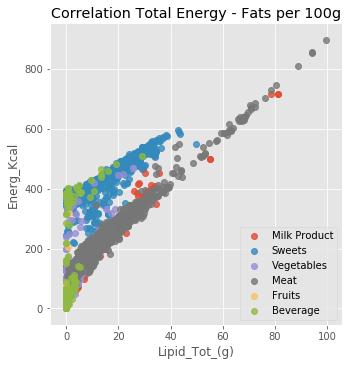

In [45]:

import seaborn as sns
 
sns.lmplot( x='Lipid_Tot_(g)', y='Energ_Kcal', data=fats_calories_fg, fit_reg=False, hue='Food_Group', legend=False)
 
plt.legend(loc='lower right')
 
ax = plt.gca()
ax.set_title("Correlation Total Energy - Fats per 100g")


#### Correlation: Total Energy (kcal) - Total Sugar (g):

In [46]:
sugar_calories_fg = df[['Food_Group','Energ_Kcal','Sugar_Tot_(g)']]
sugar_calories_fg  = sugar_calories_fg[sugar_calories_fg['Food_Group'] != '']

Text(0.5,1,'Correlation Total Energy - Sugar per 100g')

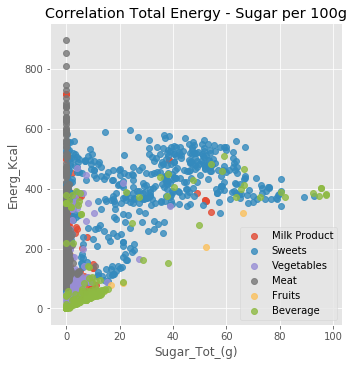

In [47]:
import seaborn as sns
 
sns.lmplot( x='Sugar_Tot_(g)', y='Energ_Kcal', data=sugar_calories_fg, fit_reg=False, hue='Food_Group', legend=False)
plt.legend(loc='lower right')
ax = plt.gca()
ax.set_title("Correlation Total Energy - Sugar per 100g")


#### Correlation: Total Energy (kcal) - Water (g):

In [48]:
water_calories_fg = df[['Food_Group','Energ_Kcal','Water_(g)']]
water_calories_fg  = water_calories_fg[water_calories_fg['Food_Group'] != '']

Text(0.5,1,'Correlation Total Energy - Water per 100g')

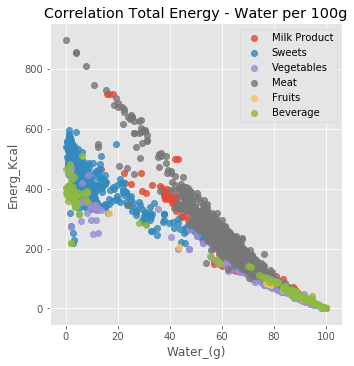

In [49]:
import seaborn as sns
 
sns.lmplot( x='Water_(g)', y='Energ_Kcal', data=water_calories_fg, fit_reg=False, hue='Food_Group', legend=False)
plt.legend(loc='upper right')
ax = plt.gca()
ax.set_title("Correlation Total Energy - Water per 100g")



### Conclusion:

It was a great idea to manually label our food data and visualizing the different food groups in our correlation plots. This allowed us to get more insight on which food groups are in which areas, it also showed us what type of food the outliers in the plot are. 

##### Interesting observations:

- the observations in the "Correlation Total Energy - Sugar per 100g" plot with nearly no sugar content are mostly meats

- only 2 different food groups are present in the high sugar per 100g area : 'Beverages' and 'Sweets' 

- in the "Correlation Total Energy - Fats per 100g" plot we see a straight grey line, this line represent the meat section of our dataset, since there are types of meat from (no/low) fat to high fat.

## What food group contains the most amount of sugar per 100g?

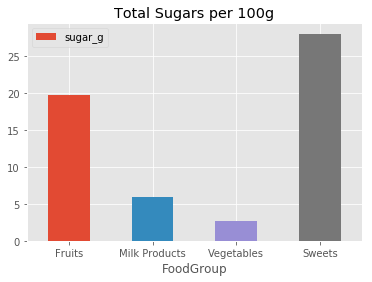

In [50]:
sugar_fruits = fruits['Sugar_Tot_(g)'].mean()
sugar_milkproducts = milk_products['Sugar_Tot_(g)'].mean()
sugar_vegetables = vegetables['Sugar_Tot_(g)'].mean()
sugar_sweets= sweets['Sugar_Tot_(g)'].mean()

sugars = pd.DataFrame(dict(FoodGroup = ['Fruits','Milk Products','Vegetables','Sweets'], sugar_g = [sugar_fruits, sugar_milkproducts, sugar_vegetables, sugar_sweets]))

ax = sugars.plot.bar(x='FoodGroup', y='sugar_g',rot=0 , title = 'Total Sugars per 100g')

## Data Analytics: Classification: Food Groups

One of our goals was also to create a classification model which can classify the group a food item belongs to based on their nutritional parameters:

- Energy in kcal
- Protein in grams
- Fats in grams
- Sugars in grams
- Carbohydrates in grams

In [51]:
df_nona = df.dropna()
df_nona = df_nona[df_nona['Food_Group'] != '']

In [52]:
X = df_nona[['Energ_Kcal', "Protein_(g)", "Carbohydrt_(g)", "Sugar_Tot_(g)", "Lipid_Tot_(g)"]].values
y = df_nona["Food_Group"].values

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(X_train)

X_train = s.transform(X_train)
X_test = s.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.837638376384


The score of our model is 0.838 that isn't to bad, but there is still **room to improve**!

We added some parameters to train our model (17 nutritional parameters in total)

In [55]:
df_nona = df.dropna()
df_nona = df_nona[df_nona['Food_Group'] != '']

In [56]:
X = df_nona[['Energ_Kcal', "Protein_(g)", "Carbohydrt_(g)", "Sugar_Tot_(g)", "Lipid_Tot_(g)", 'Water_(g)','Ash_(g)','Fiber_TD_(g)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)','Cholestrl_(mg)','Iron_(mg)','Magnesium_(mg)','Phosphorus_(mg)','Potassium_(mg)','Sodium_(mg)']].values
y = df_nona["Food_Group"].values

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(X_train)

X_train = s.transform(X_train)
X_test = s.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.926199261993


The new score of our model is 92.6%. 

# Fat Composition of different food groups:

We wanted to take a closer look at what kind of fats we find in our food groups. 

In our dataset we got informations about the amount of:
- Saturated Fats 
- Monounsaturated Fats 
- Polyunsaturated Fats

We didn't take a look at the fat distribution in fruits and vegetables, since the fat amount here is minimal.

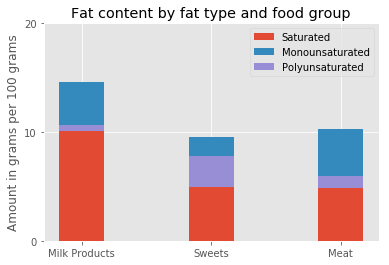

In [59]:
import numpy as np
import matplotlib.pyplot as plt


N = 3
fats_sat_Means = ( milk_products['FA_Sat_(g)'].mean(),  sweets['FA_Sat_(g)'].mean(), meat['FA_Sat_(g)'].mean())
fats_mono_Means = (milk_products['FA_Mono_(g)'].mean(),  sweets['FA_Mono_(g)'].mean(), meat['FA_Mono_(g)'].mean())
fats_poly_Means = ( milk_products['FA_Poly_(g)'].mean(),  sweets['FA_Poly_(g)'].mean(), meat['FA_Poly_(g)'].mean())
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, fats_sat_Means, width)
p2 = plt.bar(ind, fats_mono_Means, width,
             bottom=fats_sat_Means)
p3 = plt.bar(ind, fats_poly_Means, width,
             bottom=fats_sat_Means)

plt.ylabel('Amount in grams per 100 grams')
plt.title('Fat content by fat type and food group')
plt.xticks(ind, ('Milk Products',  'Sweets', 'Meat'))
plt.yticks(np.arange(0, 25, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Saturated', 'Monounsaturated', 'Polyunsaturated'))

plt.show()

As we have already expected the amount of polyunsaturated fats is the highest in Sweets. 
And relatively low in the Milk Products and Meats. 

What's also interesting is that the amount of fats in Meats is pretty much balanced (Saturated to Monounsaturated) and relatively low in polyunsaturated fats.

# Future Work Section:

- **Merge our dataset with others that contain nutrition parameters** It would be interesting to merge our dataset with one that contains information about the different food allergens. We could then use this information to give recommendation for food alternatives, also it would be interesting to take a look if there are any correlations between allergens and other nutrition parameters.

- **Trying other clustering algorithms** to hopefully identify better clusters in our data.

- **Improving our classification model**
